In [1]:
%load_ext load_style
%load_style talk.css

# IPython notebook widgets

from `version 2.0`, IPython includes an architecture for **interactive widgets** that tie together Python code running in the kernel and JavaScript/HTML/CSS running in the browser. These widgets enable users to **explore their code and data interactively**.

In [2]:
from IPython.html.widgets import interactive, interact, fixed
from IPython.html import widgets

:0: FutureWarning: IPython widgets are experimental and may change in the future.


### simple function that just prints its argument

In [3]:
def f(x):
    print(x)

### if x is a integer, a widget slider will be created

In [4]:
interact(f, x=10); 

10


#### you can also use a python `decorator` syntax

In [5]:
from datetime import datetime

In [6]:
@interact(x=10)
def f(x):
    print(x)

10


### If x is Boolean (True / False), a checkbox is created

In [7]:
interact(f, x=True); 

True


### If x is a string: text box

In [8]:
interact(f, x='Hi there!');

Hi there!


### Widgets can be called with arguments to customize them

In [9]:
interact(f, x=widgets.IntSliderWidget(min=-20,max=40,step=2,value=10));

10


### An example with plot

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
%matplotlib inline

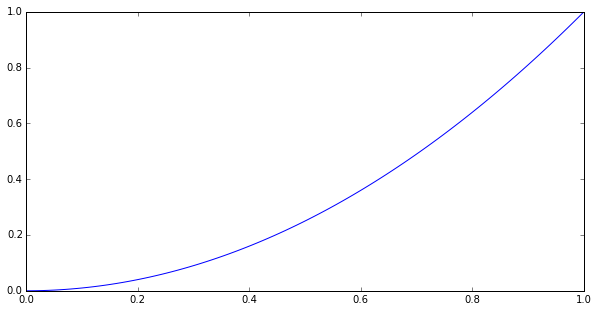

In [12]:
@interact(degree=2)
def f(degree):
    x = np.linspace(0,1,100)
    f, ax = plt.subplots(figsize=(10,5))
    plt.plot(x, x**degree)
    plt.show()

### An example using [sympy](http://sympy.org/en/index.html) to factor polynomials

In [13]:
from IPython.display import display

In [14]:
from sympy import Symbol, Eq, factor, init_printing
init_printing(use_latex='mathjax')

In [15]:
x = Symbol('x')

In [16]:
def factorit(n):
    display(Eq(x**n-1, factor(x**n-1)))

In [17]:
factorit(12)

 12                       ⎛ 2    ⎞ ⎛ 2        ⎞ ⎛ 2        ⎞ ⎛ 4    2    ⎞
x   - 1 = (x - 1)⋅(x + 1)⋅⎝x  + 1⎠⋅⎝x  - x + 1⎠⋅⎝x  + x + 1⎠⋅⎝x  - x  + 1⎠

In [18]:
interact(factorit, n=(2,40));

 21               ⎛ 2        ⎞ ⎛ 6    5    4    3    2        ⎞ ⎛ 12    11    
x   - 1 = (x - 1)⋅⎝x  + x + 1⎠⋅⎝x  + x  + x  + x  + x  + x + 1⎠⋅⎝x   - x   + x

9    8    6    4    3        ⎞
  - x  + x  - x  + x  - x + 1⎠

### Exploring the Lorenz equations using IPython widgets

The Lorenz system is a system of ordinary differential equations (the Lorenz equations) first studied by [Edward Lorenz](http://en.wikipedia.org/wiki/Edward_Norton_Lorenz). It is notable for having chaotic solutions for certain parameter values and initial conditions. In particular, the Lorenz attractor is a set of chaotic solutions of the Lorenz system which, when plotted, resemble a butterfly or figure eight.

The system is described by: 

$$
\begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} &= \sigma (y - x), \\
\frac{\mathrm{d}y}{\mathrm{d}t} &= x (\rho - z) - y, \\
\frac{\mathrm{d}z}{\mathrm{d}t} &= x y - \beta z.
\end{align} 
$$

$x$, $y$, and $z$ make up the system state, $t$ is time, and $\sigma$, $\rho$, $\beta$ are the system parameters

The small animation below shows a sample solution for when when ρ = 28, σ = 10, and β = 8/3 (Values used by Lorenz)

![](http://upload.wikimedia.org/wikipedia/commons/1/13/A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif)

The IPython widget infrastructure is a convenient way to visualise what happens to the solutions as we vary the parameters

In [19]:
from IPython.display import clear_output, display, HTML

In [20]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

  We define a function that can integrate the system of differential equations numerically and then plot the solutions. This function has arguments that control the parameters of the differential equation ($\sigma$, $\beta$, $\rho$), the numerical integration (N, max_time) and the visualization (angle).

In [21]:
def solve_lorenz(N=10, angle=0.0, max_time=10.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv((x, y, z), t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorentz system."""
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

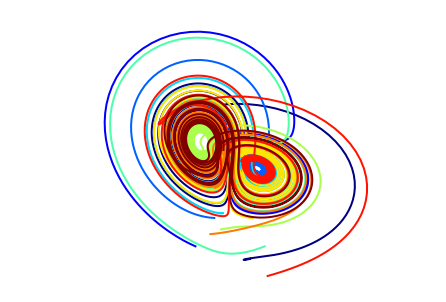

In [22]:
t, x_t = solve_lorenz(angle=0, N=10)

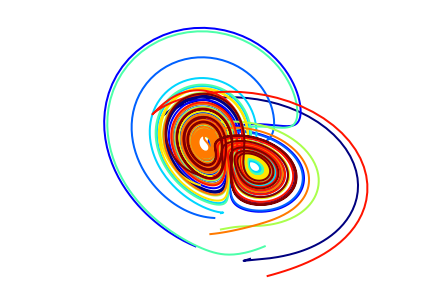

In [23]:
w = interactive(solve_lorenz, N=(0,50), max_time=(0,30), angle=(0.,360.), sigma=(0.0,50.0), rho=(0.0,50.0), beta=(0,30) )
display(w)

In [24]:
import pandas as pd

In [25]:
xdf = pd.DataFrame({'A':np.random.randn(5), 'B':np.random.randn(5)})

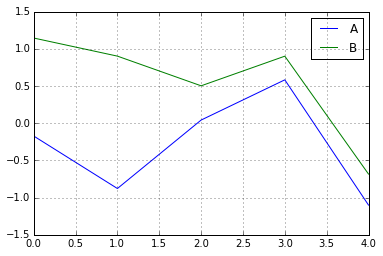

In [26]:
xdf.plot()

In [27]:
def plot_df(label):
    xdf[label].plot()

In [28]:
w = interactive(plot_df, label=['A','B'])

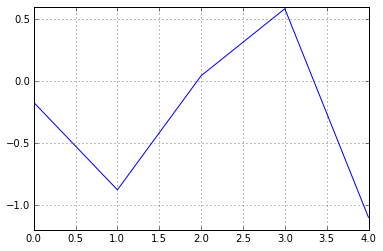

In [29]:
display(w)

In [31]:
!ipython nbconvert IPython_widgets.ipynb --to html

[NbConvertApp] Converting notebook IPython_widgets.ipynb to html
[NbConvertApp] Writing 442485 bytes to IPython_widgets.html
